In [2]:
import pandas as p
from sklearn.preprocessing import MinMaxScaler

data = p.read_csv('crypto_data.csv', header=[0,1], index_col=0)

close_df = p.DataFrame({coin: data[coin]['Close'] for coin in data.columns.levels[0]})
print(close_df.head())


               BNB-USD       BTC-USD  DOGE-USD      ETH-USD    SOL-USD
Date                                                                  
2023-01-01  244.136978  16625.080078  0.070225  1200.964844   9.982173
2023-01-02  245.535904  16688.470703  0.071454  1214.656616  11.272967
2023-01-03  246.133362  16679.857422  0.070468  1214.778809  13.344046
2023-01-04  259.119690  16863.238281  0.073237  1256.526611  13.435113
2023-01-05  256.422852  16836.736328  0.071550  1250.438599  13.419330


In [3]:
close_df = close_df.fillna(method='ffill').fillna(method='bfill')

/tmp/ipython-input-2842904514.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_df = close_df.fillna(method='ffill').fillna(method='bfill')


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_df)

scaled_df = p.DataFrame(scaled_data, index=close_df.index, columns=close_df.columns)
print(scaled_df.head())

             BNB-USD   BTC-USD  DOGE-USD   ETH-USD   SOL-USD
Date                                                        
2023-01-01  0.071384  0.000000  0.030112  0.000000  0.000000
2023-01-02  0.073951  0.000708  0.033114  0.004778  0.005224
2023-01-03  0.075047  0.000612  0.030706  0.004821  0.013606
2023-01-04  0.098873  0.002661  0.037469  0.019390  0.013975
2023-01-05  0.093925  0.002364  0.033349  0.017265  0.013911


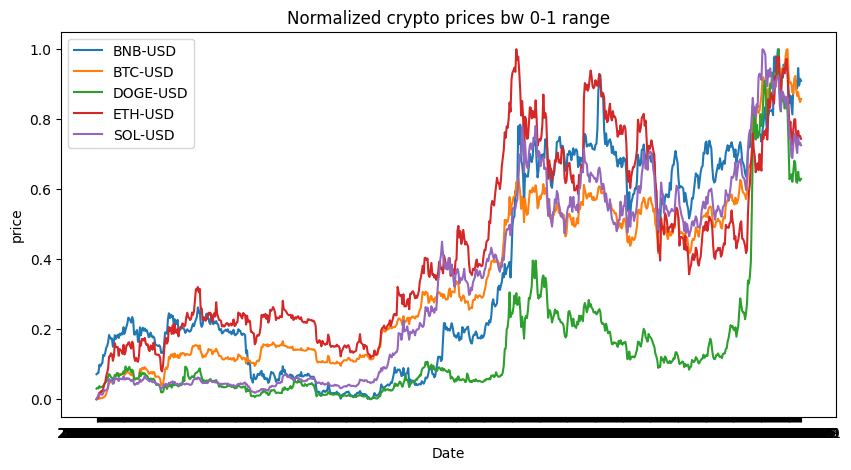

In [5]:
import matplotlib.pyplot as pl

pl.figure(figsize=(10,5))
for coin in scaled_df.columns:
  pl.plot(scaled_df.index, scaled_df[coin], label=coin)
pl.title('Normalized crypto prices bw 0-1 range')
pl.xlabel('Date')
pl.ylabel('price')
pl.legend()
pl.show()


In [6]:
scaled_df.to_csv('crypto_scaled.csv')
print('saved')

saved
